#### Task 8: Clustering with K-means

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset

df = pd.read_csv('Mall_Customers.csv')

# Displaying the first few rows of the dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# basic info about the dataset

df.info()
df.describe()
# checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

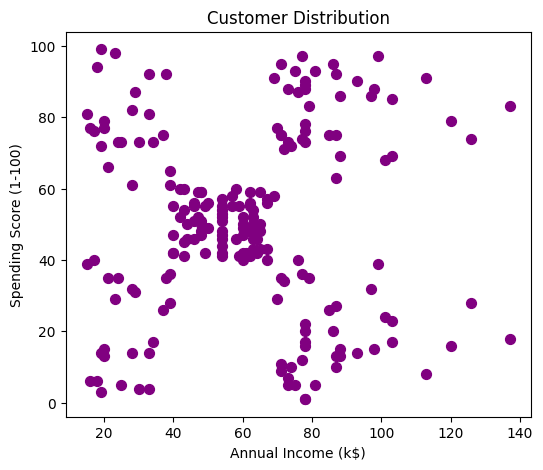

In [4]:
# Select relevant numerical features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# visualize data distribution
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='purple', s=50)
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


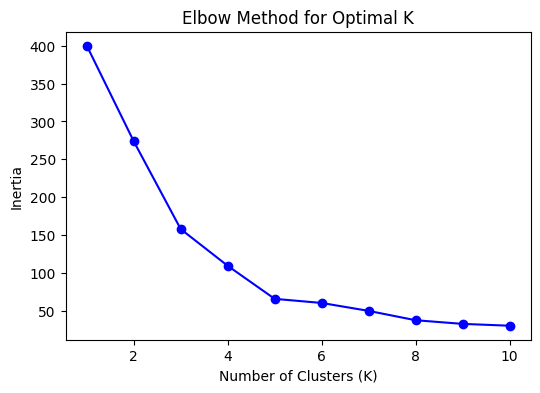

In [5]:
# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [6]:
# Fit with optimal K
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Cluster centers (in scaled space)
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


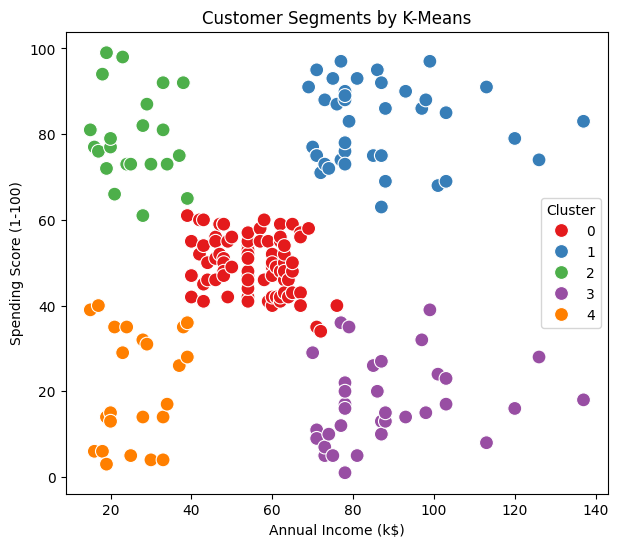

In [7]:
# Visualize clusters
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


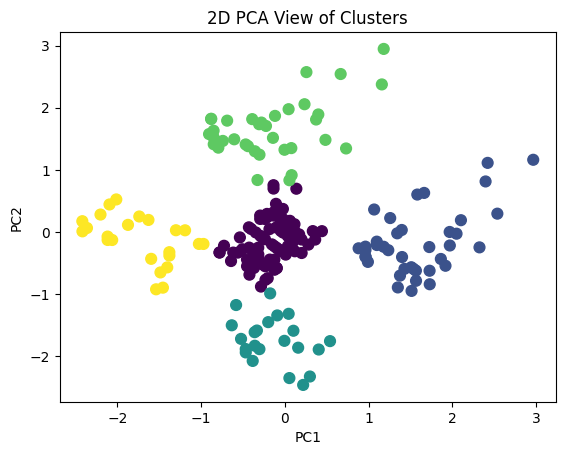

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis', s=60)
plt.title('2D PCA View of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [9]:
# Calculate Silhouette Score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))

Silhouette Score: 0.555
